In [67]:
# this reads a multiple set of readings from a file called testpulsemulti50avg.txt

# set up the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
# Function to read the file
import numpy

def readmeasurements(fname):
    measurements = [ ]
    samplespersecond = 0
    for fline in open(fname):
        sfline = fline.split()
        samplespersecond = max(samplespersecond, len(sfline))
        measurements.extend(tuple(map(int, v.split(",")))  for v in sfline)
    return samplespersecond, numpy.array(measurements)


In [86]:
# Reading the file and saying how many sensors 
samplespersecond, measurements = readmeasurements("testpulsemulti50avg.txt")
totalseconds = measurements.shape[0]/samplespersecond
print("seconds:", totalseconds)
print("adc sensors:", measurements.shape[1])
print("samples per second:", samplespersecond)


seconds: 85.0
adc sensors: 3
samples per second 50


In [272]:
# plot function which rescales the range according to the range it works in
def plotsensor(measurementcol, t0, t1, label=None, color=None):
    lm = measurementcol[int(t0*samplespersecond):int(t1*samplespersecond)]
    lm = (lm - lm.mean())/max(10, lm.std())
    plt.plot(numpy.arange(t0, t1, 1/samplespersecond), lm, label=label, color=color)
    return lm


30.1171573265
16.3378170716


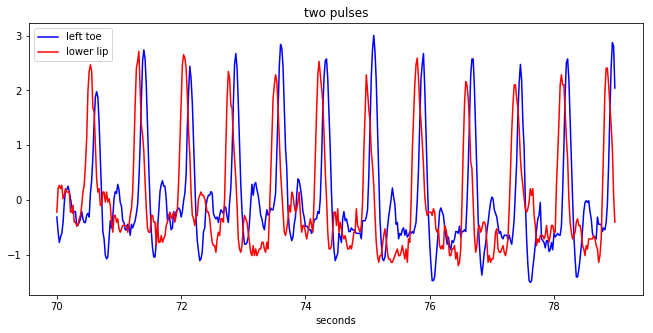

In [124]:
# actually plot the sensors

# Set the size of the image
plt.figure(figsize=(11, 5))

# Set 
t0, t1 = 70, 79

# Pick which and lines to plot (comment out bad ones) and label them
#lm0 = plotsensor(measurements[:,0], t0, t1, "label0")
lm1 = plotsensor(measurements[:,1], t0, t1, label="left toe", color="blue")
lm2 = plotsensor(measurements[:,2], t0, t1, label="lower lip", color="red")

# ^^ As well as plotting the measurements, this function trims them out, scales 
# the sensors measurements about Zero and returms them to lm1

# plot decorations and titles
plt.xlabel("seconds")
plt.title("two pulses")
plt.legend()

# You can save to a file like this:
#plt.savefig("thing.png")

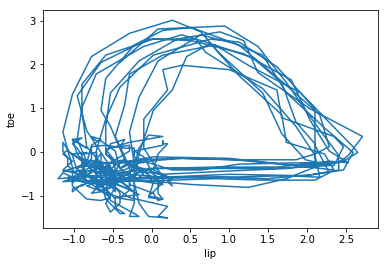

In [127]:
# We can plot one sensor against another and see how the follow
# showing how you get one wave ahead of another
plt.plot(lm2, lm1)
plt.xlabel("lip")
plt.ylabel("toe")


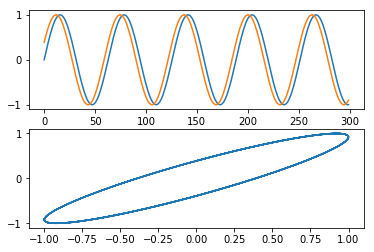

In [134]:
# To see what that diagram means, we can try experiment with a simple sine wave
trange = numpy.arange(0, 30, 0.1)  # <-- set of numbers from 0 to 30 steps of 0.1
delayt = 0.4  # <--- change this
ax = plt.subplot(2,1,1)
ax.plot(numpy.sin(trange))
ax.plot(numpy.sin(trange+delayt))
ax = plt.subplot(2,1,2)
ax.plot(numpy.sin(trange), numpy.sin(trange+delayt))



In [ ]:
### Can we apply some audio signal processing to this signal:
# https://www.safaribooksonline.com/library/view/elegant-scipy/9781491922927/ch04.html

# This is Wavelet technology!!!

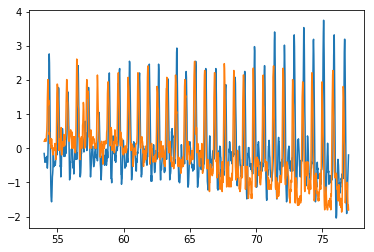

In [274]:
# get a long series (maybe include some junk)
lm1 = plotsensor(measurements[:,1], 54, 77)
lm2 = plotsensor(measurements[:,2], 54, 77)

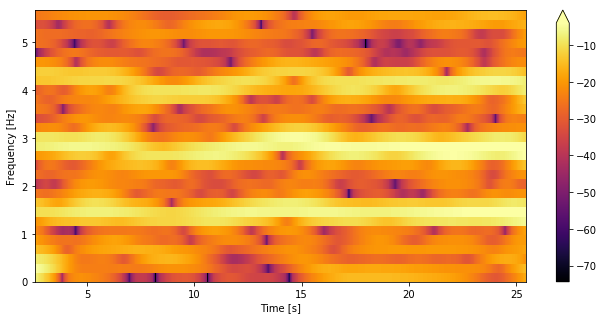

In [269]:
M = 256
freqs, times, Sx = scipy.signal.spectrogram(lm2, fs=50, window='hanning',
                                      nperseg=M, noverlap= M - 2,
                                      detrend=False, scaling='spectrum')

# trim down the number of frequencies plotted (there aren't any higher frequencies there)
# this shows how the heartrate varies over time
freqs = freqs[:30]
Sx = Sx[:len(freqs),:]

Sx = numpy.clip(Sx, 0, 0.4)  # <-- clamp the max readings to a range
f, ax = plt.subplots(figsize=(11, 5))

Sx = 10 * numpy.log10(Sx)  # <-- log scale so not washed out by big numbers
pcm = ax.pcolormesh(times, freqs, Sx, cmap='inferno')
#   for cmap see:  http://matplotlib.org/examples/color/colormaps_reference.html
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [s]');
plt.colorbar(pcm, ax=ax, extend='max')


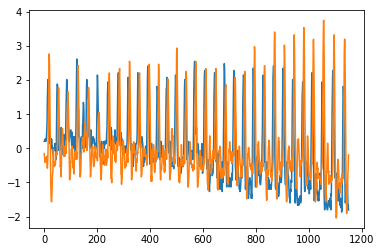

In [275]:

## Now look for correlation between the two pulse sensors
lm = lm2  # lips
lmC = lm1 # toe

plt.plot(lm)
plt.plot(lmC)

Original shape: (1250,), Sliced shape: (225, 128)


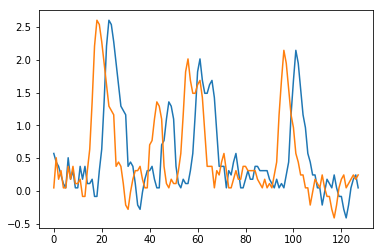

In [194]:
import skimage

M = 128  # width of the sample window
slices = skimage.util.view_as_windows(lm, window_shape=(M,), step=5)
slicesC = skimage.util.view_as_windows(lm, window_shape=(M,), step=5)

win = numpy.hanning(M + 1)[:-1]  
slices = slices * win
slicesC = slices * win


# Slices are just little sections cut out from the pulse measurements
plt.plot(slices[20]) 
plt.plot(slicesC[20])



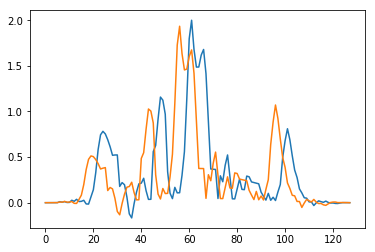

In [195]:
# flatten out the ends of these samples into wavelets using the hanning window
win = numpy.hanning(M + 1)[:-1]  
slices = slices * win
plt.plot(slices[20]) 
plt.plot(slices[21])


In [196]:
# Now apply the Fast Fourier Transform to each wavelet
spectrum = numpy.fft.fft(slices, axis=0)
#spectrum = spectrum[:,:M // 2 + 1:-1]
spectrum = numpy.abs(spectrum)
spectrum.shape


(225, 128)

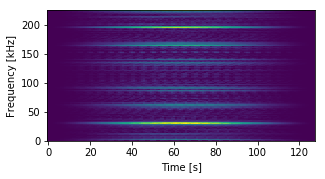

In [198]:
f, ax = plt.subplots(figsize=(4.8, 2.4))

S = numpy.abs(spectrum)
#S = 20 * numpy.log10(S / numpy.max(S))

ax.imshow(S, origin='lower', cmap='viridis')
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');


In [ ]:
imshow(Z, interpolation='nearest', origin='lower', extent=[0,1.5,0,3.78], aspect='auto')
colorbar()
show()

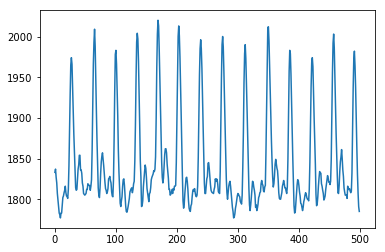

In [41]:
t0, t1 = 75, 85
lm = measurements[int(t0*samplespersecond):int(t1*samplespersecond), 1]
plt.plot(lm)
    

In [77]:
import scipy.signal

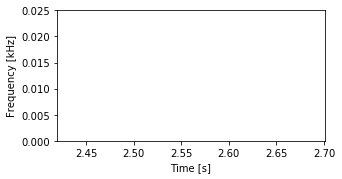

In [80]:
lm = measurements[int(t0*samplespersecond):int(t1*samplespersecond), 2]
freqs, times, Sx = scipy.signal.spectrogram(lm, fs=50, window='hanning') #,
                                      #nperseg=1024, noverlap=M - 100,
                                      #detrend=False, scaling='spectrum')



f, ax = plt.subplots(figsize=(4.8, 2.4))
ax.pcolormesh(times, freqs / 1000, 10 * numpy.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

/home/julian/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


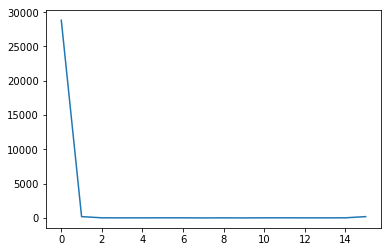

In [56]:
plt.plot(numpy.fft.fft(lm[:16]))
    